In [1]:
# Read file
with open('file.txt', 'r') as file:
    readme = file.read()

In [2]:
with open('Inventory.txt') as inventory_file:
    inventory_txt = inventory_file.read()

with open('stations.txt') as stations_file:
    stations_txt = stations_file.read()

In [3]:
print(inventory_txt[:137])

ACW00011604  17.1167  -61.7833 TMAX 1949 1949
ACW00011604  17.1167  -61.7833 TMIN 1949 1949
ACW00011604  17.1167  -61.7833 PRCP 1949 1949


In [4]:
# parse to named tuples
from collections import namedtuple
# use namedtuple to create a custom Inventory class
Inventory = namedtuple("Inventory", ['station', 'latitude', 'longitude',
'element', 'start', 'end'])

In [5]:
# parse inventory lines and convert some values to floats and ints
inventory = [Inventory(x[0:11], float(x[12:20]), float(x[21:30]), x[31:35],
int(x[36:40]), int(x[41:45]))
for x in inventory_txt.split("\n") if x.startswith("US")]

In [6]:
for line in inventory[:5]:
    print(line)

Inventory(station='US009052008', latitude=43.7333, longitude=-96.6333, element='TMAX', start=2008, end=2016)
Inventory(station='US009052008', latitude=43.7333, longitude=-96.6333, element='TMIN', start=2008, end=2016)
Inventory(station='US009052008', latitude=43.7333, longitude=-96.6333, element='PRCP', start=2008, end=2016)
Inventory(station='US009052008', latitude=43.7333, longitude=-96.6333, element='SNWD', start=2009, end=2016)
Inventory(station='US10RMHS145', latitude=40.5268, longitude=-105.1113, element='PRCP', start=2004, end=2004)


In [7]:
inventory_temps = [x for x in inventory if x.element in ['TMIN', 'TMAX']
                   and x.end >= 2015 and x.start < 1920]
inventory_temps[:5]

[Inventory(station='USC00010252', latitude=31.3072, longitude=-86.5225, element='TMAX', start=1912, end=2018),
 Inventory(station='USC00010252', latitude=31.3072, longitude=-86.5225, element='TMIN', start=1912, end=2018),
 Inventory(station='USC00010583', latitude=30.8839, longitude=-87.7853, element='TMAX', start=1915, end=2024),
 Inventory(station='USC00010583', latitude=30.8839, longitude=-87.7853, element='TMIN', start=1915, end=2024),
 Inventory(station='USC00011694', latitude=32.8158, longitude=-86.6044, element='TMAX', start=1893, end=2024)]

In [8]:
# Downtown Chicago, obtained via online map
latitude, longitude = 41.882, -87.629

inventory_temps.sort(key=lambda x: abs(latitude-x.latitude) + abs(longitude-x.longitude))

inventory_temps[:20]

[Inventory(station='USC00110338', latitude=41.7803, longitude=-88.3092, element='TMAX', start=1893, end=2024),
 Inventory(station='USC00110338', latitude=41.7803, longitude=-88.3092, element='TMIN', start=1893, end=2024),
 Inventory(station='USC00112736', latitude=42.0628, longitude=-88.2861, element='TMAX', start=1897, end=2024),
 Inventory(station='USC00112736', latitude=42.0628, longitude=-88.2861, element='TMIN', start=1897, end=2024),
 Inventory(station='USC00476922', latitude=42.7028, longitude=-87.7858, element='TMAX', start=1896, end=2024),
 Inventory(station='USC00476922', latitude=42.7028, longitude=-87.7858, element='TMIN', start=1896, end=2024),
 Inventory(station='USC00124837', latitude=41.6117, longitude=-86.7297, element='TMAX', start=1897, end=2024),
 Inventory(station='USC00124837', latitude=41.6117, longitude=-86.7297, element='TMIN', start=1897, end=2024),
 Inventory(station='USC00119021', latitude=40.7939, longitude=-87.7544, element='TMAX', start=1893, end=2020),
 

In [9]:
# As you look at the top 20 entries in your newly sorted list, it seems that the first station,
# USC00110338, is a good fit. It's got both TMIN and TMAX and one of the longerseries, starting in 1893 and 
# running up through 2024, for more than 120 years’ worth of data.

# So now we will save that station into our station variable and quickly parse the station
# data we've already grabbed to pick up a little more information about the station.

In [10]:
station_id = 'USC00110338'

# parse stations
Station = namedtuple("Station", ['station_id', 'latitude', 'longitude', 'elevation', 'state', 'name', 'start', 'end'])

stations = [(x[0:11], float(x[12:20]), float(x[21:30]), float(x[31:37]), x[38:40].strip(), x[41:71].strip())
            for x in stations_txt.split("\n") if x.startswith(station_id)]

station = Station(*stations[0] + (inventory_temps[0].start, inventory_temps[0].end))
print(station)

Station(station_id='USC00110338', latitude=41.7803, longitude=-88.3092, elevation=201.2, state='IL', name='AURORA', start=1893, end=2024)


In [11]:
# At this point, we've identified that we want weather data from the station at Aurora,
# Illinois, which is the nearest station to downtown Chicago with more than a century’s
# worth of temperature data.

# With the station identified, the next step is fetching the actual weather data for that
# station and parsing it.

In [12]:
# fetch daily records for selected station

with open('weather_station.txt') as weather_file:
    weather = weather_file.read()

print(weather[:540])

USC00110338189301TMAX  -11  6  -44  6 -139  6  -83  6 -100  6  -83  6  -72  6  -83  6  -33  6 -178  6 -150  6 -128  6 -172  6 -200  6 -189  6 -150  6 -106  6  -61  6  -94  6  -33  6  -33  6  -33  6  -33  6    6  6  -33  6  -78  6  -33  6   44  6  -89 I6  -22  6    6  6
USC00110338189301TMIN  -50  6 -139  6 -250  6 -144  6 -178  6 -228  6 -144  6 -222  6 -178  6 -250  6 -200  6 -206  6 -267  6 -272  6 -294  6 -294  6 -311  6 -200  6 -233  6 -178  6 -156  6  -89  6 -200  6 -194  6 -194  6 -178  6 -200  6  -33 I6 -156  6 -139  6 -167  6



In [13]:
# we can see it's quite a bit more complex than the station and inventory data.
# This means that to process each line of weather data, we need to:
# 1. Split the line into its separate fields, and ignore or discard the flags for each daily value.
# 2. Remove the values with -9999, and convert the year and month into ints and the temperature values 
#    into floats, keeping in mind that the temperature readings are in tenths of degrees centigrade.
# 3. Calculate the average value, and pick out the high and low values.

In [14]:
def parse_line(line):
    """ parses line of weather data
        removes values of -9999 (missing value)
    """
    # return None if line is empty
    if not line:
        return None
    # split out first 4 fields and string containing temperature values
    record, temperature_string = (line[:11], int(line[11:15]), int(line[15:17]), line[17:21]), line[21:]
    # raise exception if the temperature string is too short
    if len(temperature_string) < 248:
        raise ValueError("String not long enough - {} {}".format(temperature_string, str(line)))
    # use a list comprehension on the temperature_string to extract and convert the
    values = [float(temperature_string[i:i + 5])/10 for i in range(0, 248, 8) if not temperature_string[i:i + 5].startswith("-9999")]
    # get the number of values, the max and min, and calculate average
    count = len(values)
    tmax = round(max(values), 1)
    tmin = round(min(values), 1)
    mean = round(sum(values)/count, 1)
    # add the temperature summary values to the record fields extracter earlier and return
    return record + (tmax, tmin, mean, count)

In [15]:
parse_line(weather[:270])

('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31)

In [16]:
# process all weather data
# list comprehension, will not parse empty lines
weather_data = [parse_line(line) for line in weather.split("\n") if line]
weather_data[:10]                

[('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31),
 ('USC00110338', 1893, 1, 'TMIN', -3.3, -31.1, -19.2, 31),
 ('USC00110338', 1893, 1, 'PRCP', 8.9, 0.0, 1.1, 31),
 ('USC00110338', 1893, 1, 'SNOW', 10.2, 0.0, 1.0, 31),
 ('USC00110338', 1893, 1, 'WT16', 0.1, 0.1, 0.1, 2),
 ('USC00110338', 1893, 1, 'WT18', 0.1, 0.1, 0.1, 11),
 ('USC00110338', 1893, 2, 'TMAX', 5.6, -17.2, -0.9, 27),
 ('USC00110338', 1893, 2, 'TMIN', 0.6, -26.1, -11.7, 27),
 ('USC00110338', 1893, 2, 'PRCP', 15.0, 0.0, 2.0, 28),
 ('USC00110338', 1893, 2, 'SNOW', 12.7, 0.0, 0.6, 28)]

In [17]:
len(weather_data)

10951

In [18]:
import sqlite3

conn = sqlite3.connect("weather_data.db")
cursor = conn.cursor()

'''# create weather table
create_weather = """CREATE TABLE "weather" (
    "id" text NOT NULL,
    "year" integer NOT NULL,
    "month" integer NOT NULL,
    "element" text NOT NULL,
    "max" real,
    "min" real,
    "mean" real,
    "count" integer)"""
cursor.execute(create_weather)
conn.commit()

# store parsed weather data in database
for record in weather_data:
    cursor.execute("""insert into weather (id, year, month, element, max, min, mean, count) values (?,?,?,?,?,?,?,?) """, record)
conn.commit()'''

'# create weather table\ncreate_weather = """CREATE TABLE "weather" (\n    "id" text NOT NULL,\n    "year" integer NOT NULL,\n    "month" integer NOT NULL,\n    "element" text NOT NULL,\n    "max" real,\n    "min" real,\n    "mean" real,\n    "count" integer)"""\ncursor.execute(create_weather)\nconn.commit()\n\n# store parsed weather data in database\nfor record in weather_data:\n    cursor.execute("""insert into weather (id, year, month, element, max, min, mean, count) values (?,?,?,?,?,?,?,?) """, record)\nconn.commit()'

In [19]:
cursor.execute("""select * from weather where element='TMAX' order by year, month""")
tmax_data = cursor.fetchall()
tmax_data[:5]

[('USC00110338', 1893, 1, 'TMAX', 4.4, -20.0, -7.8, 31),
 ('USC00110338', 1893, 2, 'TMAX', 5.6, -17.2, -0.9, 27),
 ('USC00110338', 1893, 3, 'TMAX', 20.6, -7.2, 5.6, 30),
 ('USC00110338', 1893, 4, 'TMAX', 28.9, 3.3, 13.5, 30),
 ('USC00110338', 1893, 5, 'TMAX', 30.6, 7.2, 19.2, 31)]

In [20]:
# Now selecting the data
tmax_data = [x for x in weather_data if x[3] == 'TMAX']
tmin_data = [x for x in weather_data if x[3] == 'TMIN']
tmin_data[:5]

[('USC00110338', 1893, 1, 'TMIN', -3.3, -31.1, -19.2, 31),
 ('USC00110338', 1893, 2, 'TMIN', 0.6, -26.1, -11.7, 27),
 ('USC00110338', 1893, 3, 'TMIN', 3.3, -13.3, -4.6, 31),
 ('USC00110338', 1893, 4, 'TMIN', 12.2, -5.6, 2.2, 30),
 ('USC00110338', 1893, 5, 'TMIN', 14.4, -0.6, 5.7, 31)]

In [21]:
import pandas as pd
%matplotlib inline

tmax_df = pd.DataFrame(tmax_data, columns=['Station', 'Year', 'Month', 'Element', 'Max', 'Min', 'Mean', 'Days'])
tmin_df = pd.DataFrame(tmin_data, columns=['Station', 'Year', 'Month', 'Element', 'Max', 'Min', 'Mean', 'Days'])

<Axes: xlabel='Year'>

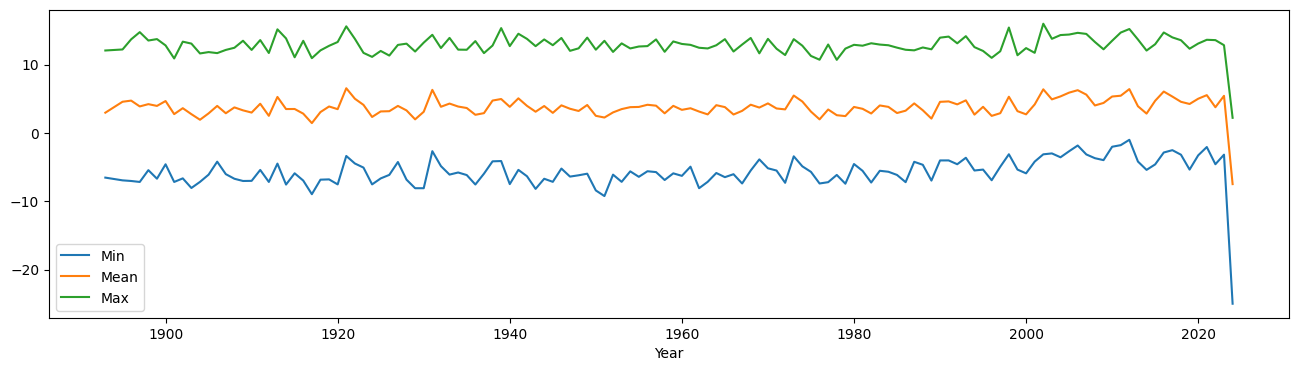

In [22]:
# select Year, Min, Max, Mean columns, group by year, average and line plot

tmin_df[['Year','Min', 'Mean', 'Max']].groupby('Year').mean().plot(kind='line', figsize=(16, 4))

In [23]:
#This result has a fair amount of variation, but it does seem to indicate that the minimum
#temperature has been on the rise for the past 20 years.